In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

# generate a daily signal covering one year 2016 in a pandas dataframe
N = 360
df_train = pd.DataFrame({"Date" : pd.date_range(start="2016-01-25", periods=N, freq='D'),
                         "Signal" : (np.arange(N)//40 + np.arange(N) % 21 + np.random.randn(N))})


In [2]:
df_train.head(12)

,Date,Signal
0,2016-01-25,1.464358
1,2016-01-26,0.065289
2,2016-01-27,2.826520
3,2016-01-28,1.384114
4,2016-01-29,1.600395
5,2016-01-30,5.202818
6,2016-01-31,6.802532
7,2016-02-01,6.434425
8,2016-02-02,9.379725
9,2016-02-03,9.701943


In [3]:
df_train.tail(12)

,Date,Signal
348,2017-01-07,20.560584
349,2017-01-08,20.240294
350,2017-01-09,23.003189
351,2017-01-10,22.219322
352,2017-01-11,24.174204
353,2017-01-12,23.723795
354,2017-01-13,25.507411
355,2017-01-14,26.983377
356,2017-01-15,27.843365
357,2017-01-16,6.826381


<AxesSubplot: xlabel='Date'>

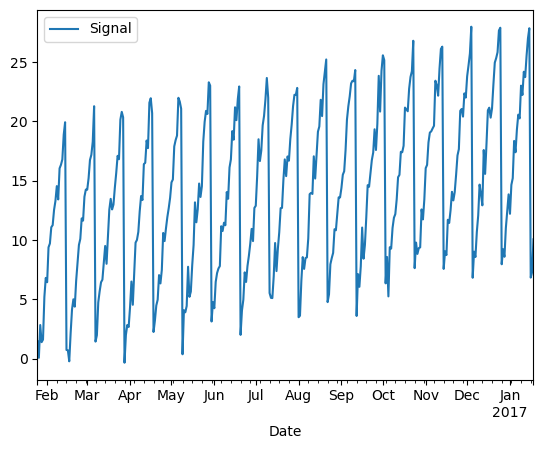

In [4]:
df_train.plot('Date' , ['Signal'])

In [5]:

import pyaf.ForecastEngine as autof
# create a forecast engine. This is the main object handling all the operations
lEngine = autof.cForecastEngine()

# get the best time series model for predicting one week
lEngine.train(iInputDS = df_train, iTime = 'Date', iSignal = 'Signal', iHorizon = 7);
lEngine.getModelInfo() # => relative error 7% (MAPE)


INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signals': ['Signal'], 'Horizons': {'Signal': 7}}))
INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['Signal'], 'Transformations': [('Signal', 'None', '_', 'T+S+R'), ('Signal', 'None', 'Diff_', 'T+S+R'), ('Signal', 'None', 'RelDiff_', 'T+S+R'), ('Signal', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal', 'Transformation': 'Diff_Signal', 'DecompositionType': 'T+S+R'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal', 'Transformation': '_Signal', 'DecompositionType': 'T+S+R'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal', 'Transformation': 'RelDiff_Signal', 'DecompositionType': 'T+S+R'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Signal', 'Transformation': 'CumSum_Signal', 'DecompositionType': 'T+S+R'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 3.606, ('TRAINING', {'Signal': 'Signal',

  Transformation DecompositionType  \
0        _Signal             T+S+R   
3        _Signal             T+S+R   
4        _Signal             T+S+R   
1        _Signal             T+S+R   
2        _Signal             T+S+R   

                                               Model    Voting Complexity  
0  _Signal_LinearTrend_residue_Seasonal_DayOfWeek...  476.0000      LSSSS  
3  _Signal_LinearTrend_residue_bestCycle_byMAPE_r...  472.4286      LSSSS  
4  _Signal_LinearTrend_residue_zeroCycle[0.0]_res...  472.4286      LSSSS  
1  _Signal_PolyTrend_residue_Seasonal_DayOfWeek_r...  472.8571      LMSSS  
2  _Signal_PolyTrend_residue_bestCycle_byMAPE_res...  472.8571      LMSSS  


INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.278, ('UPDATE_BEST_MODEL_PERFS', {'Signal': 'Signal', 'Model': '_Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)'}))
INFO:pyaf.timing:('OPERATION_START', ('COMPUTE_PREDICTION_INTERVALS', {'Signal': 'Signal'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.254, ('COMPUTE_PREDICTION_INTERVALS', {'Signal': 'Signal'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.624, ('FINALIZE_TRAINING', {'Signals': ['Signal'], 'Transformations': [('Signal', [('Signal', 'None', 'CumSum_', 'T+S+R'), ('Signal', 'None', 'Diff_', 'T+S+R'), ('Signal', 'None', 'RelDiff_', 'T+S+R'), ('Signal', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 5.706, ('TRAINING', {'Signals': ['Signal'], 'Horizons': {'Signal': 7}}))
INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2016-01-25T00:00:00.000000 TimeMax=2016-11-01T00:00:00.000000 TimeDelta=<DateOffset: days=1> Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Signal

INFO:pyaf.timing:('OPERATION_START', ('PLOTTING', {'Signals': ['Signal']}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 1.496, ('PLOTTING', {'Signals': ['Signal']}))


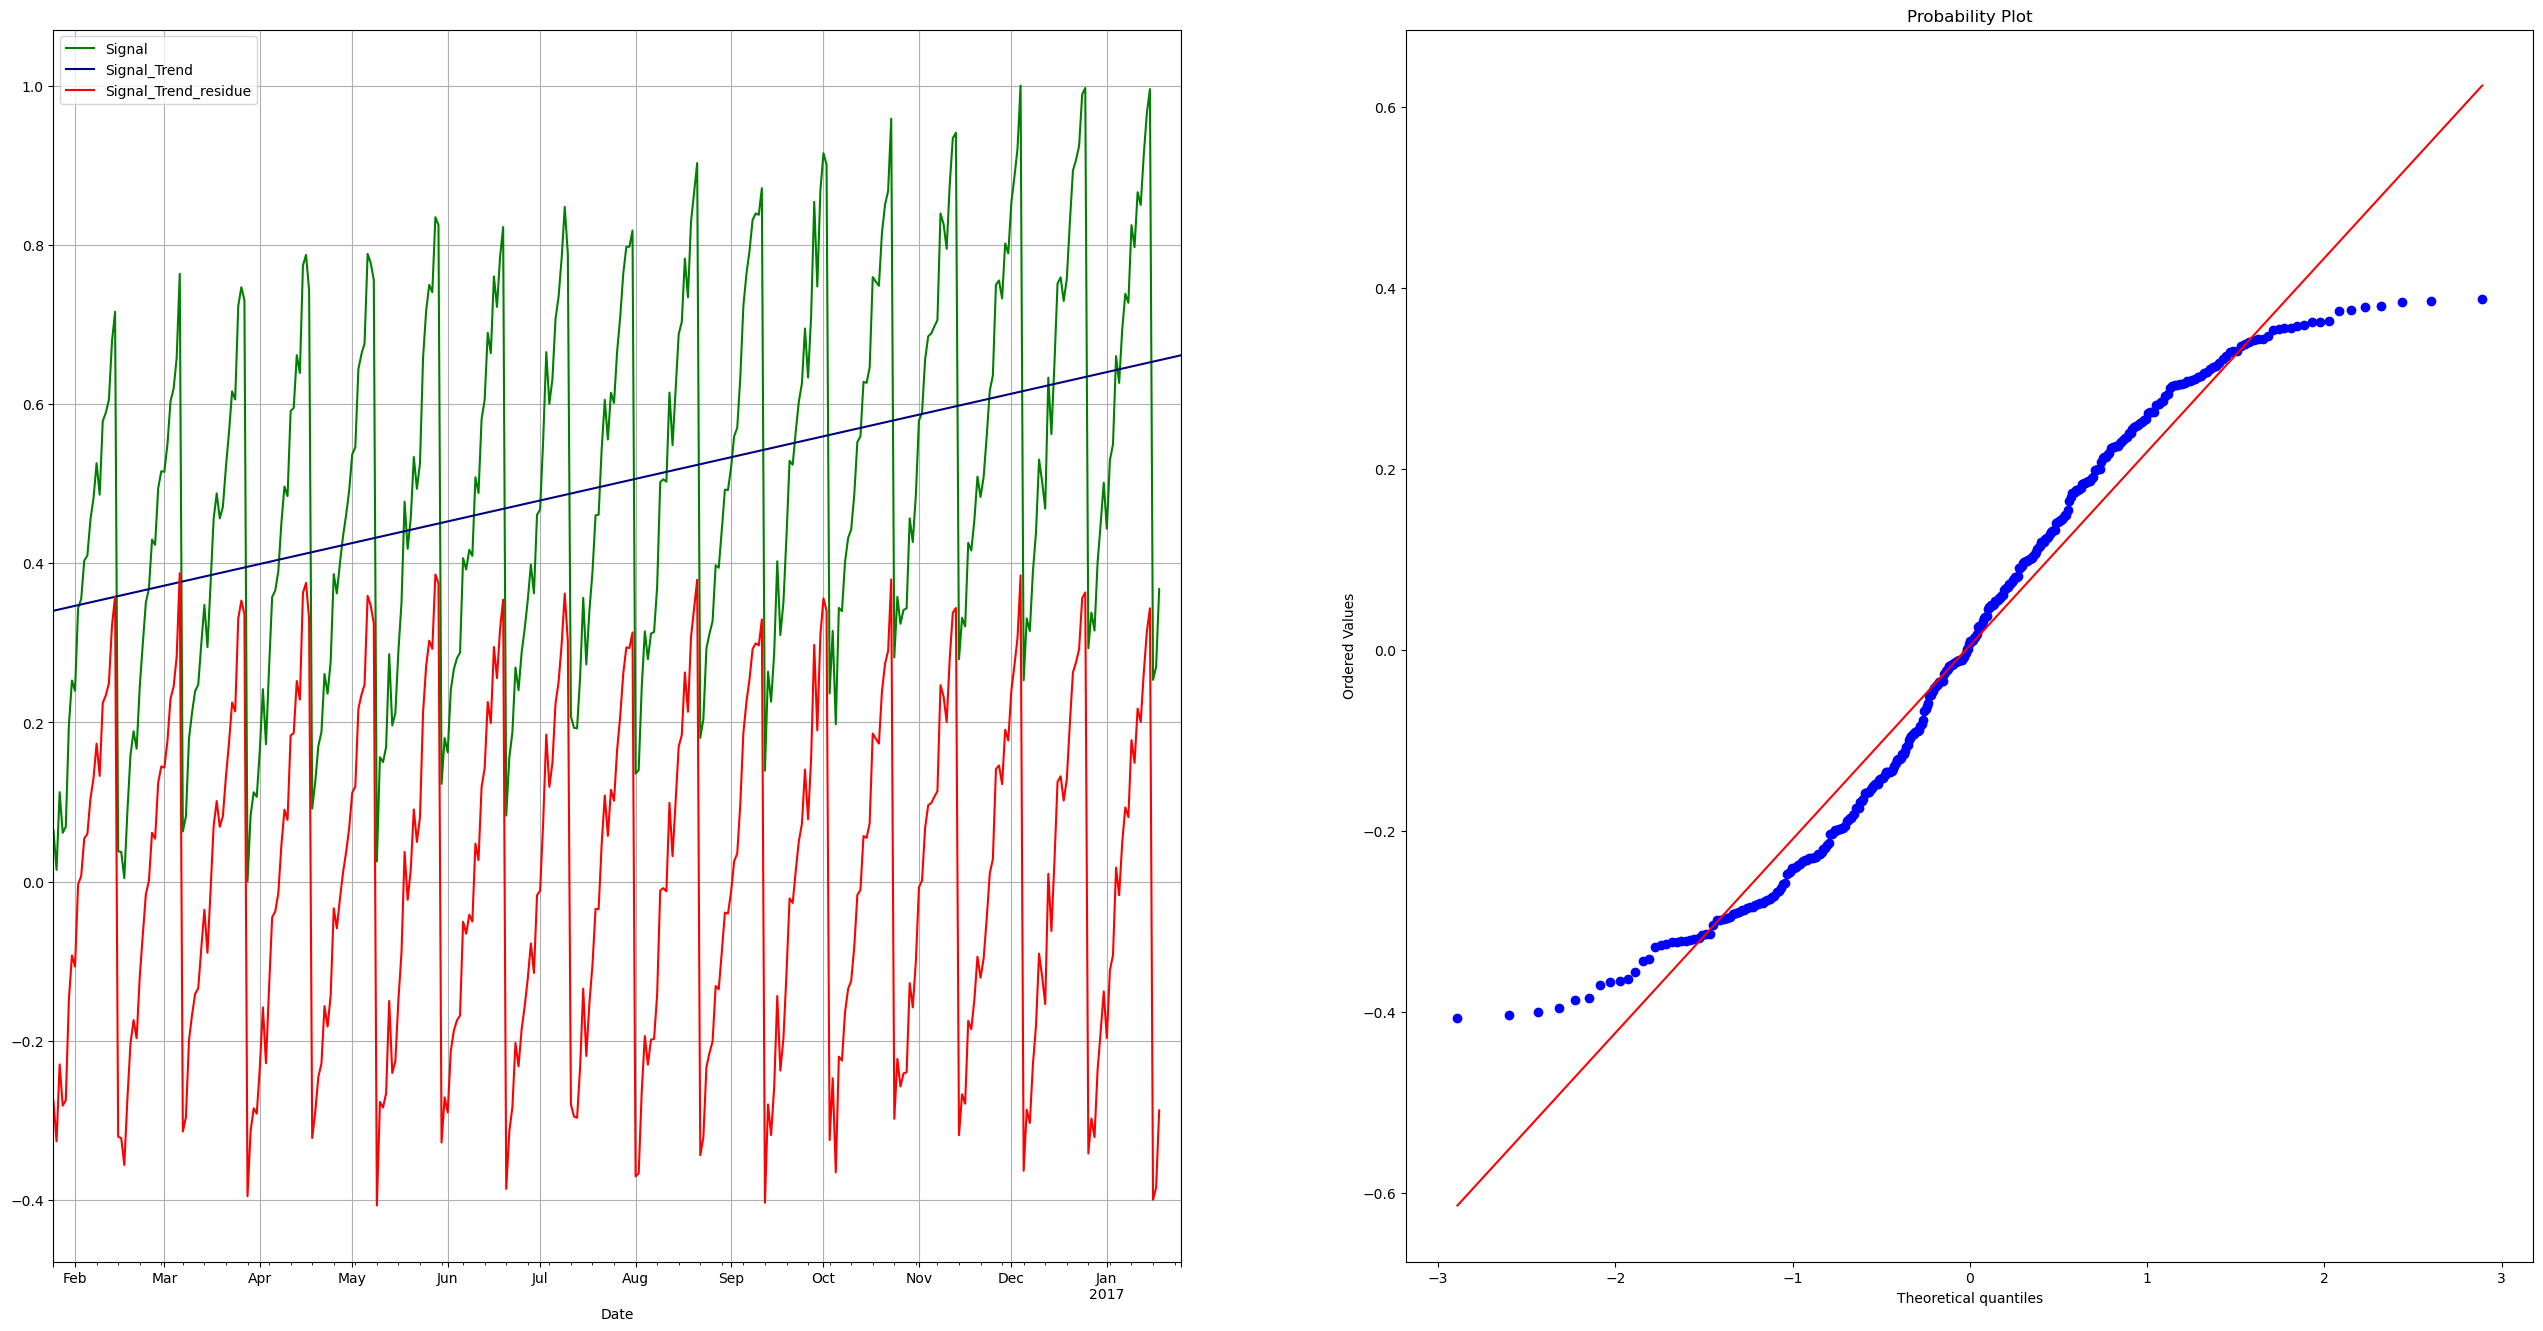

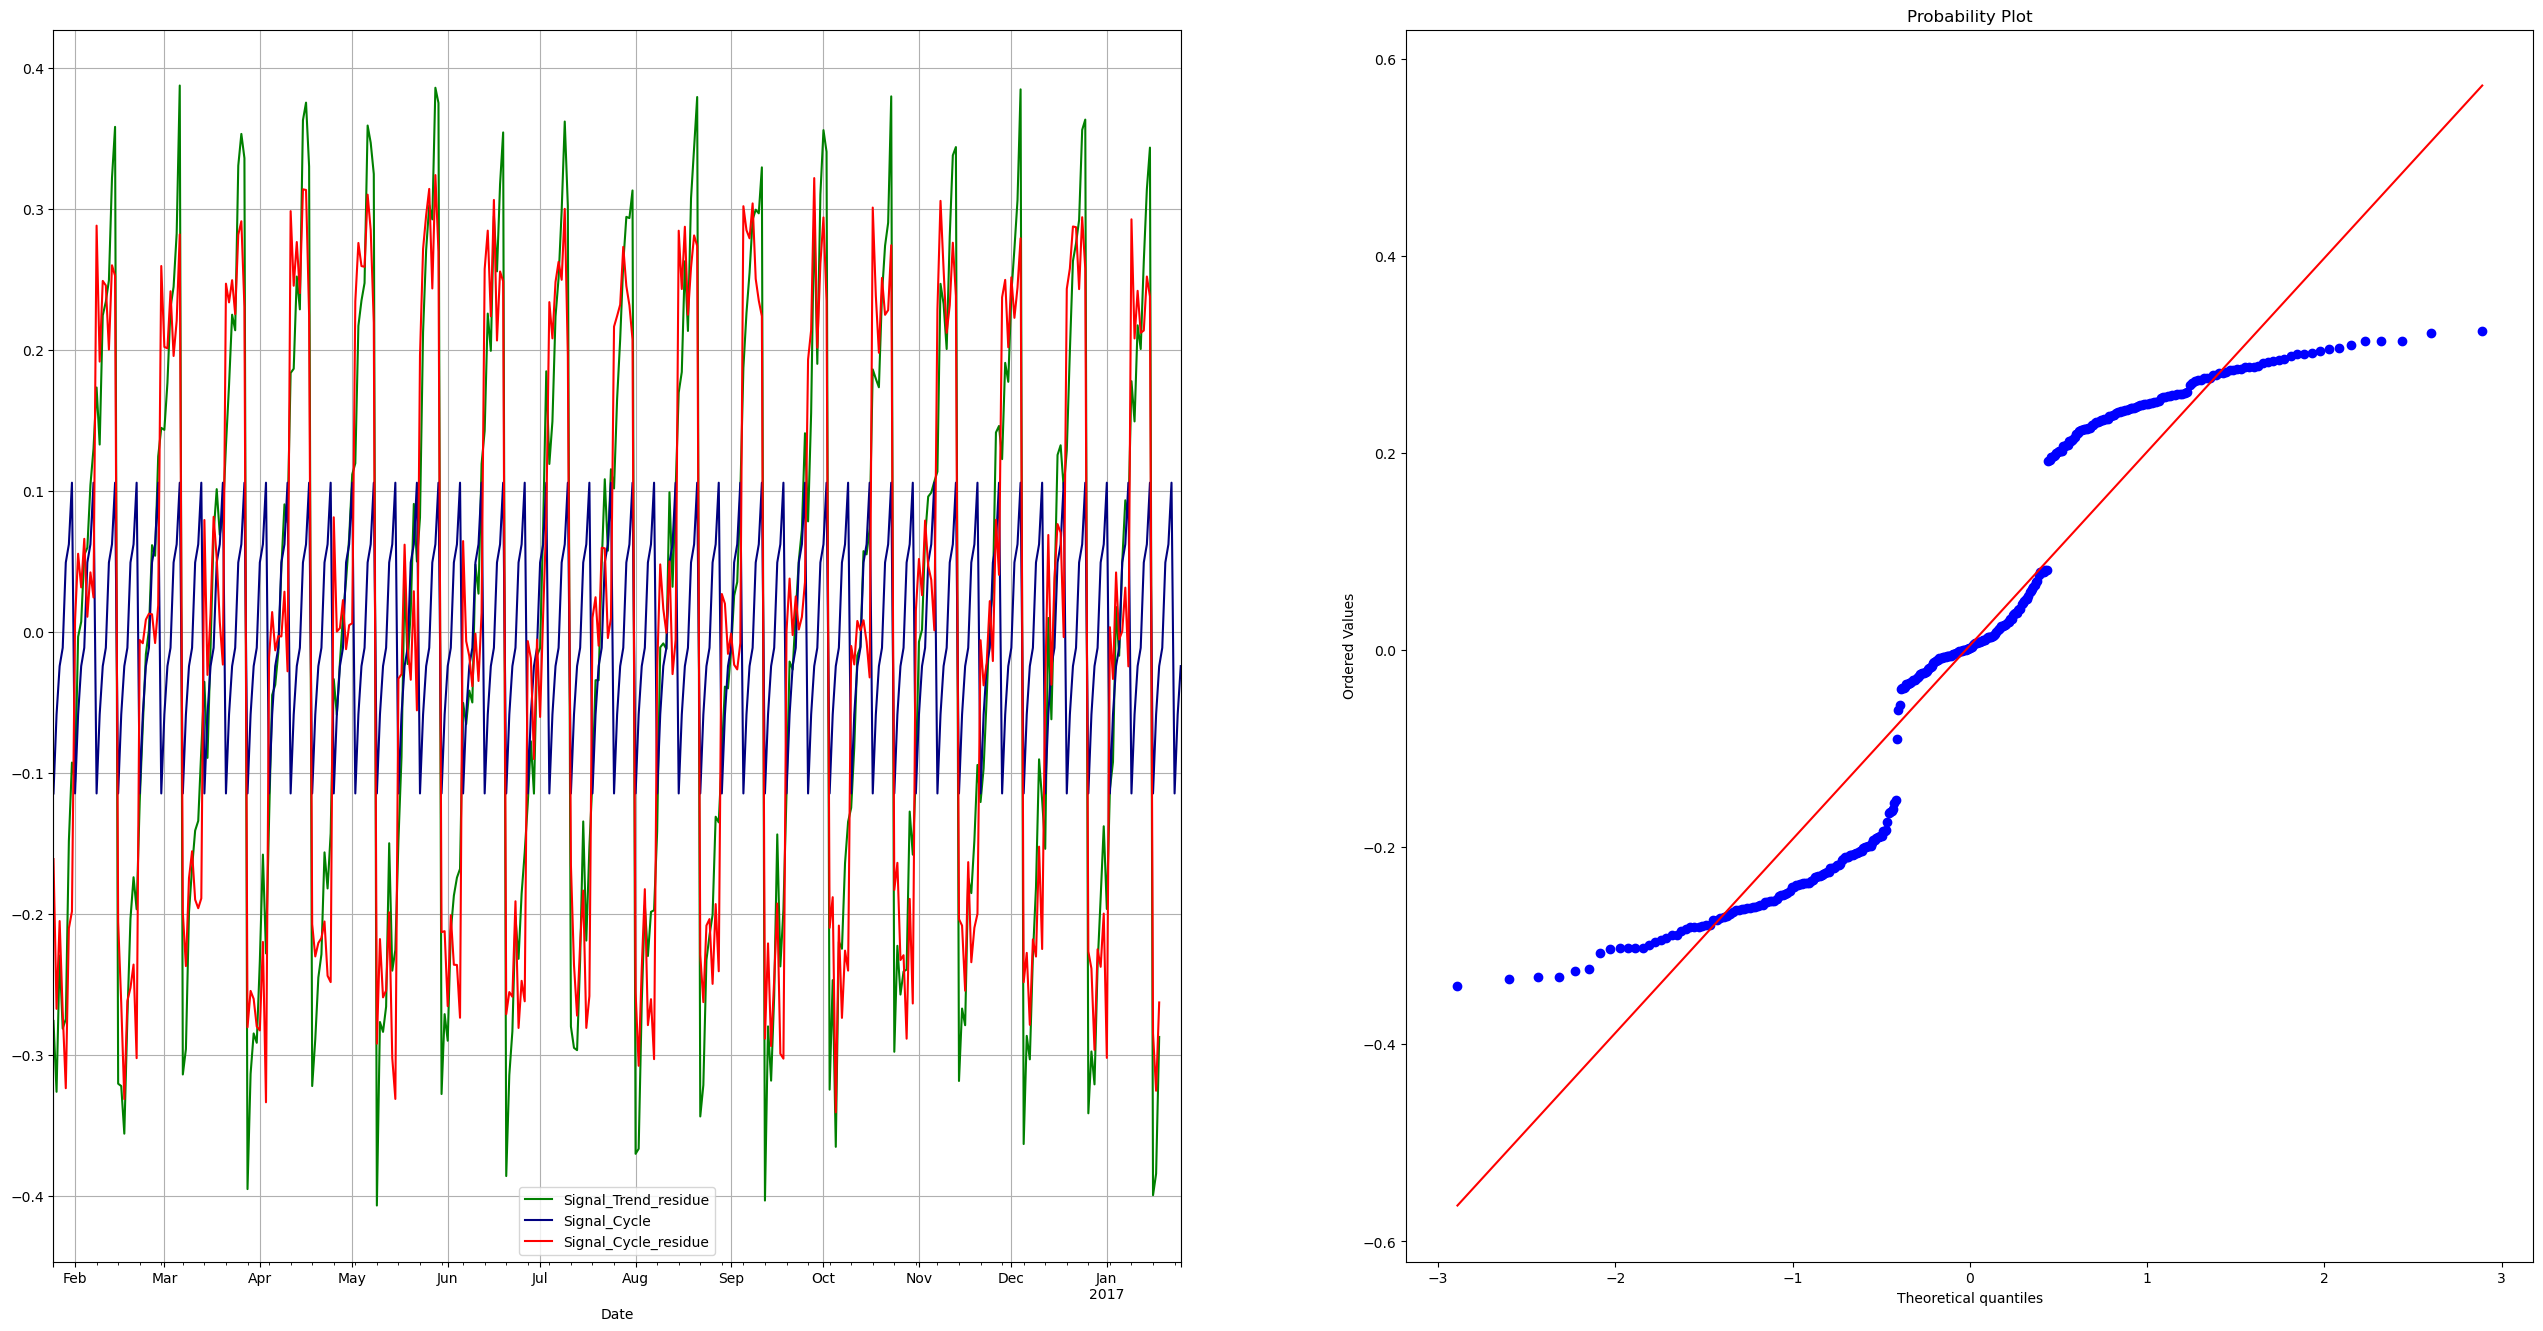

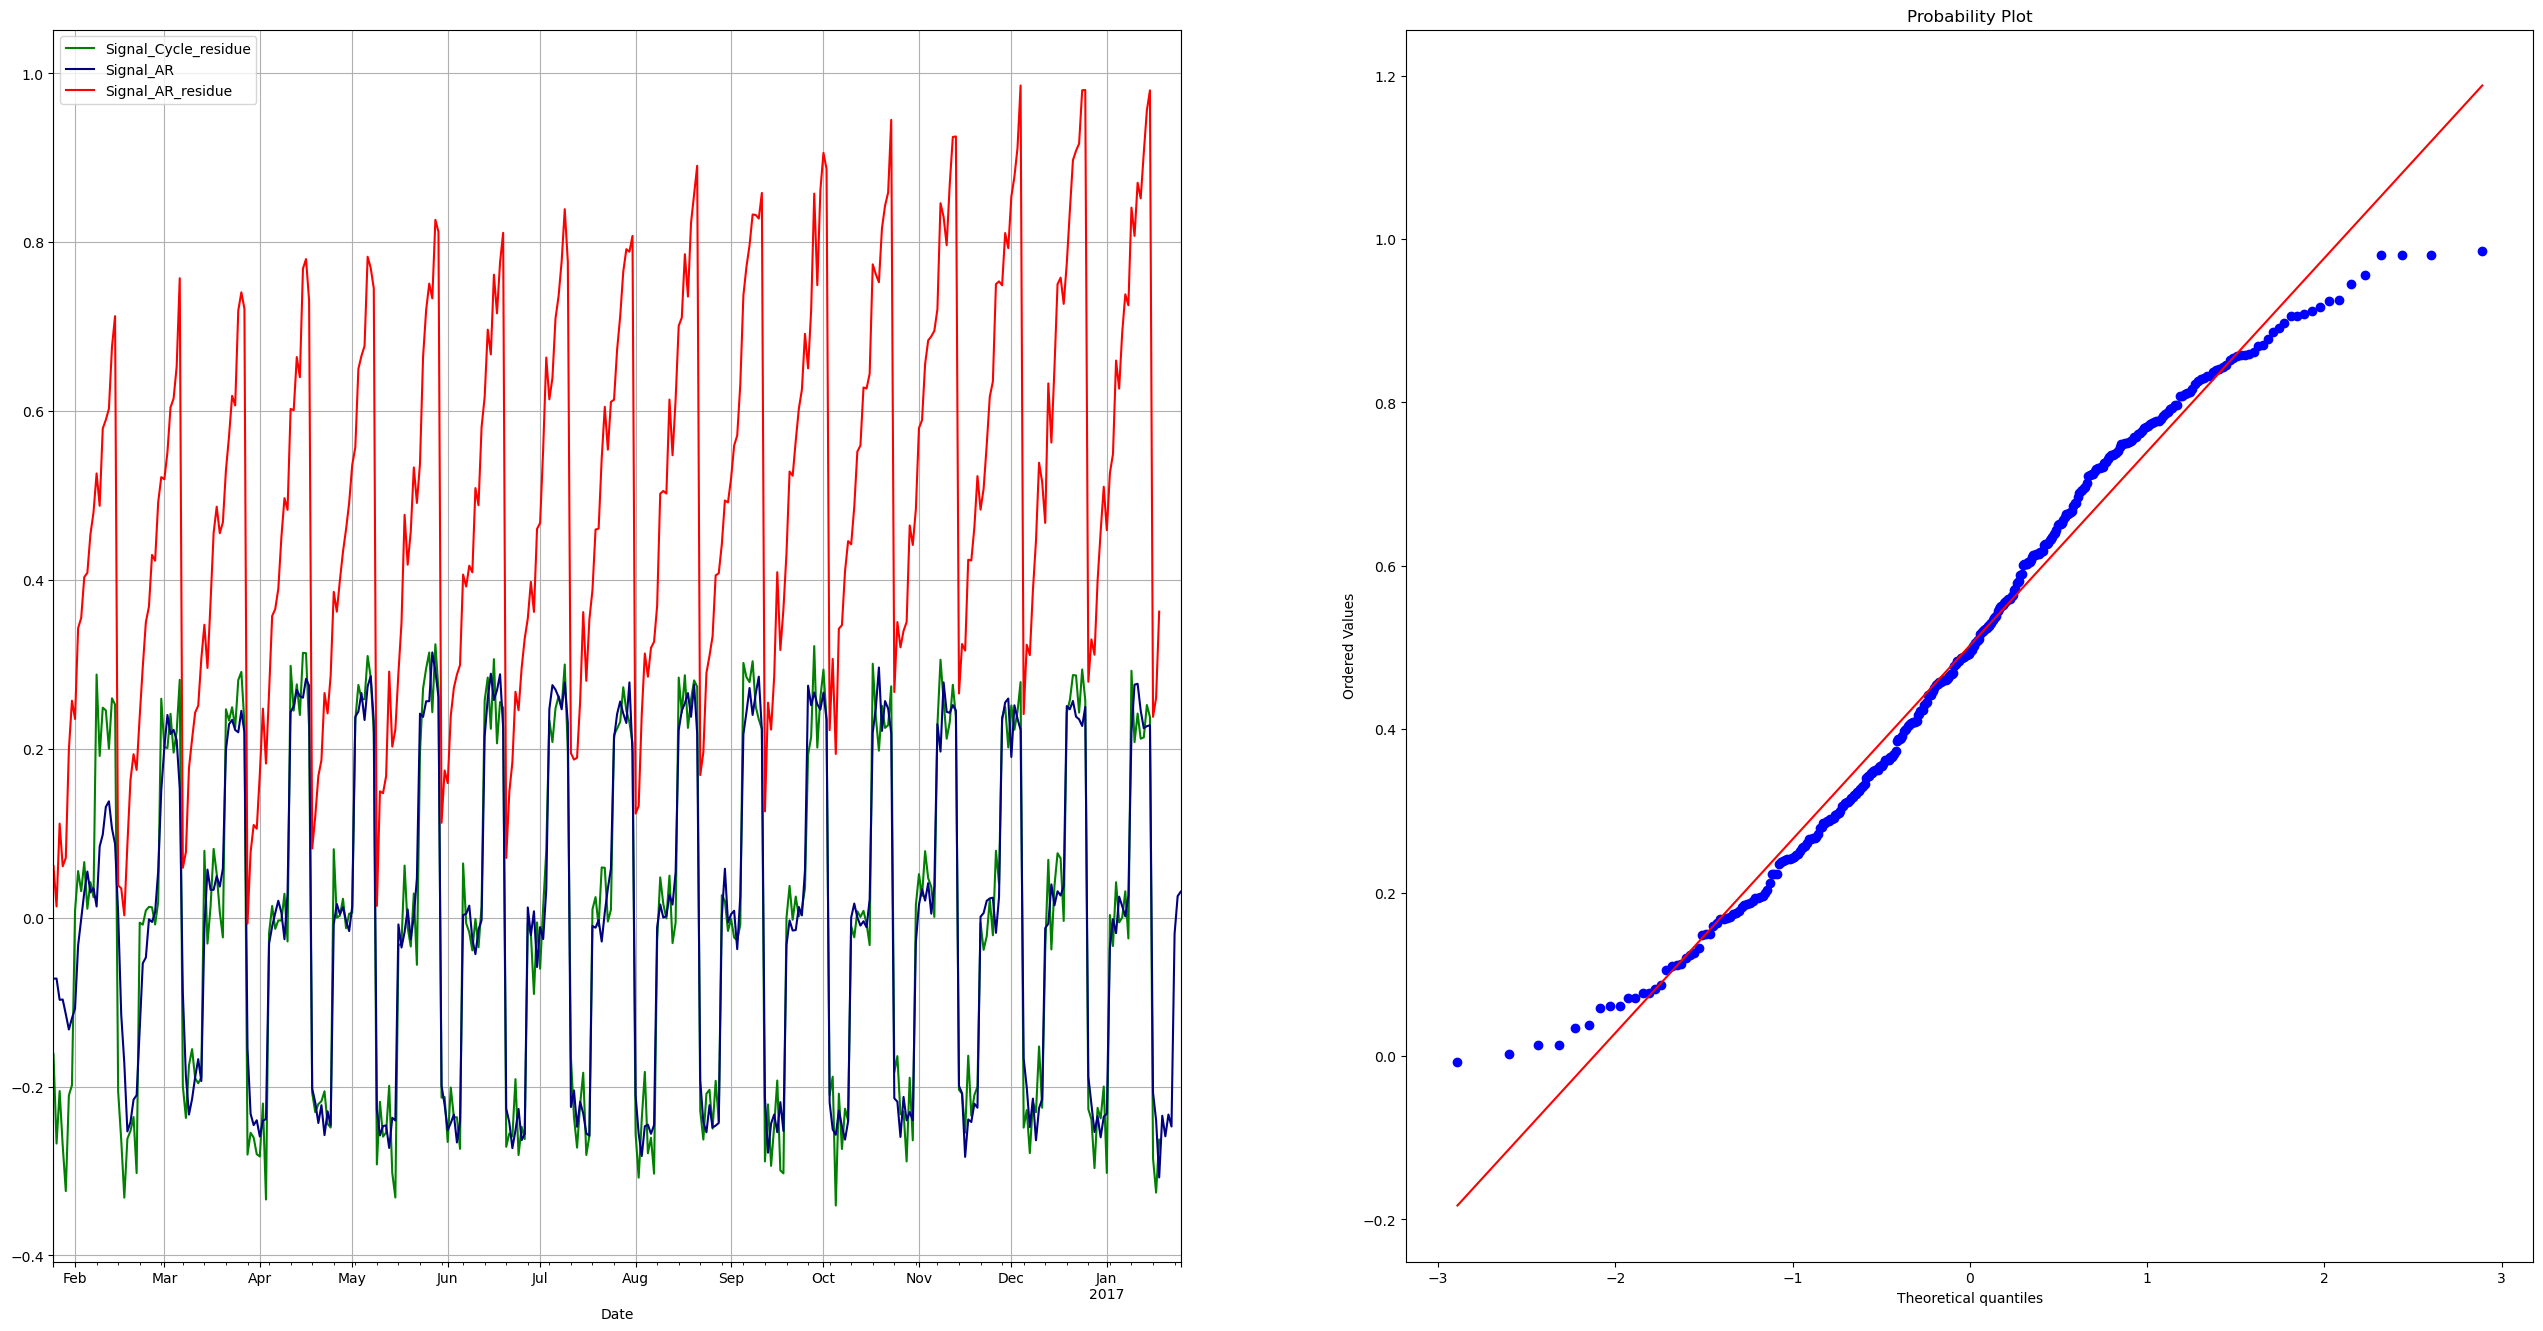

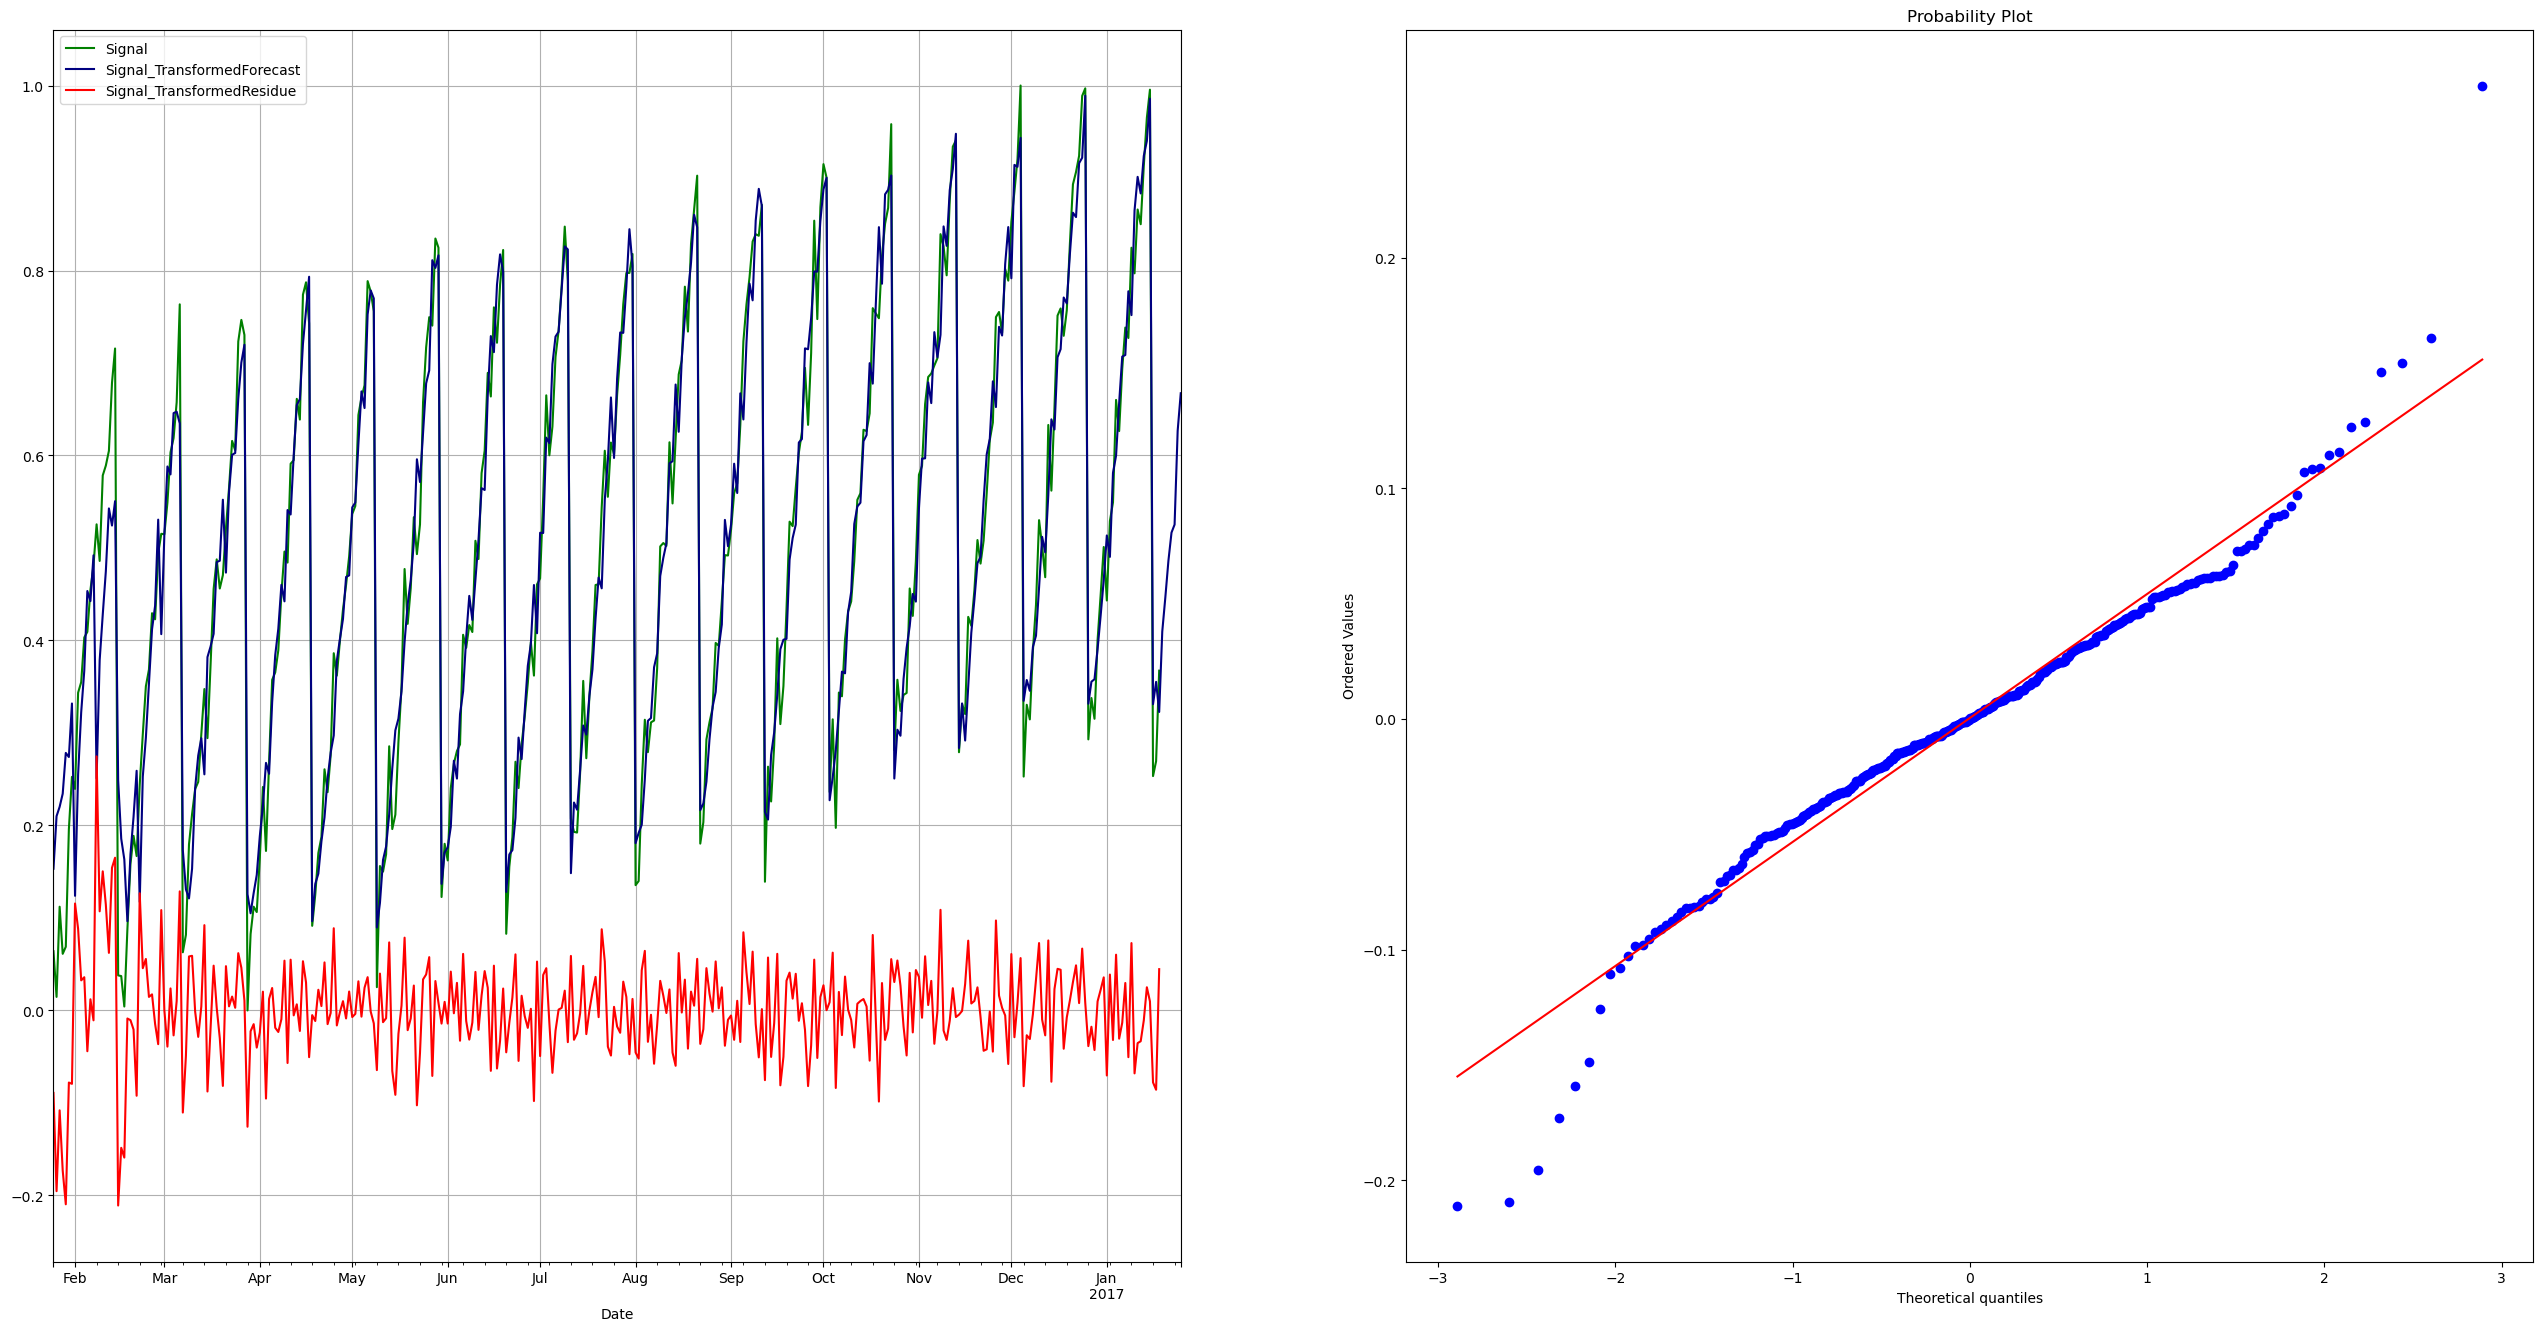

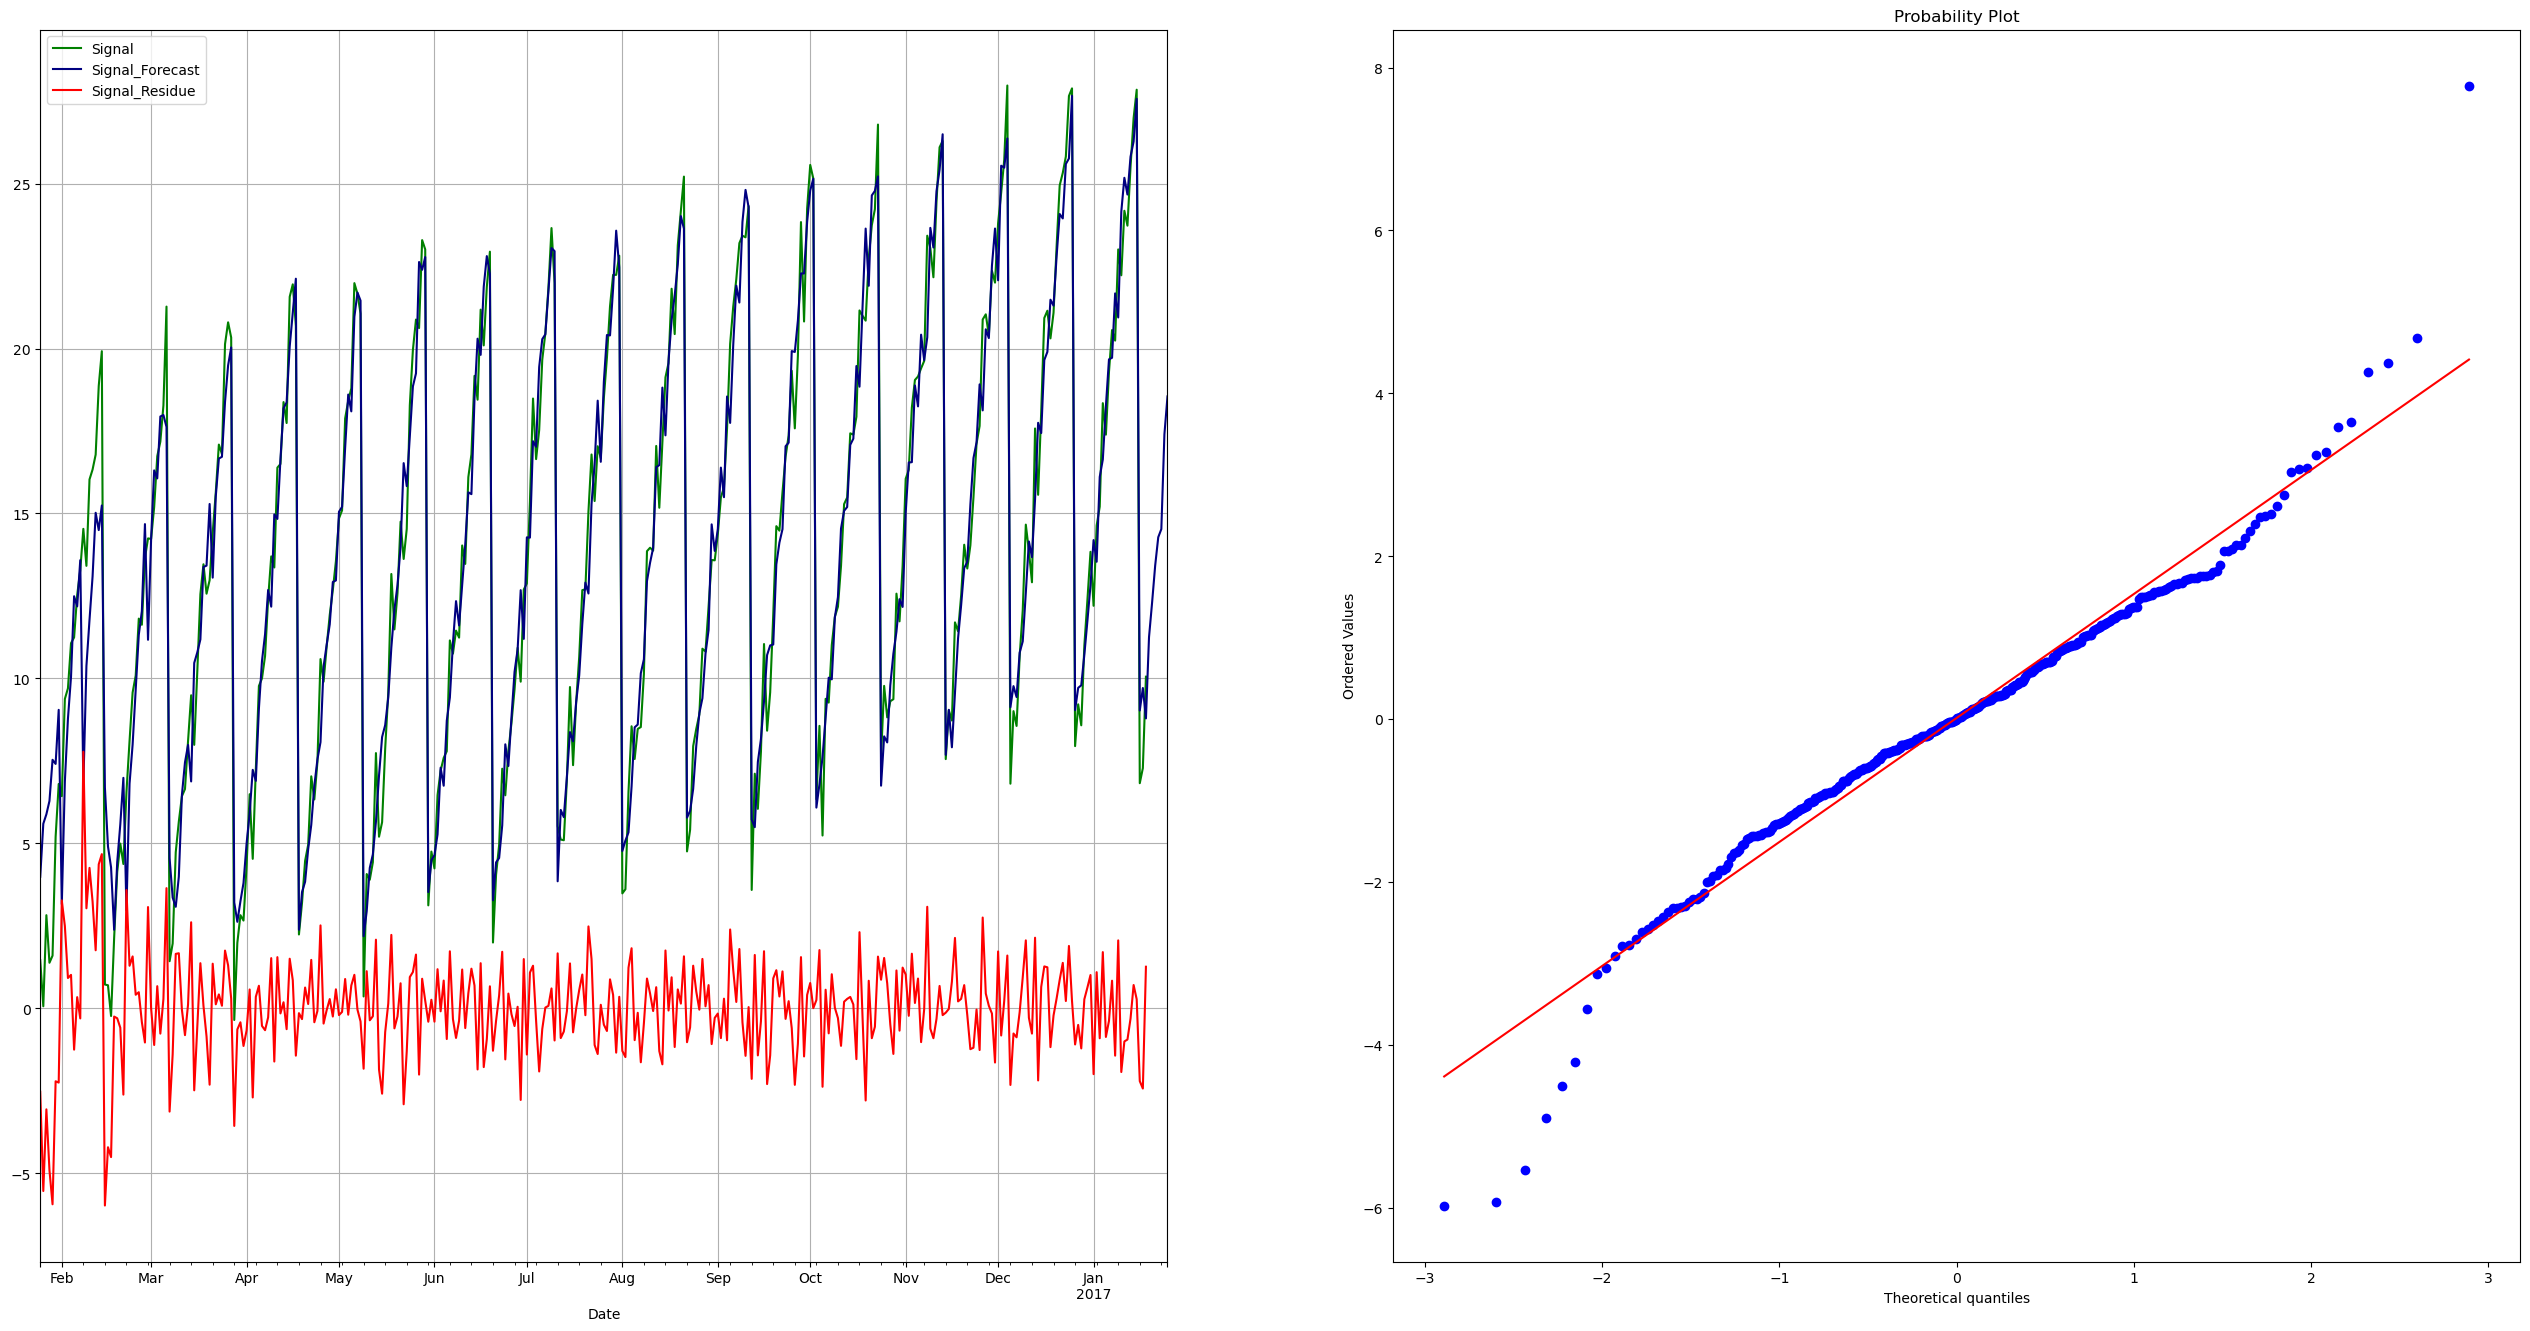

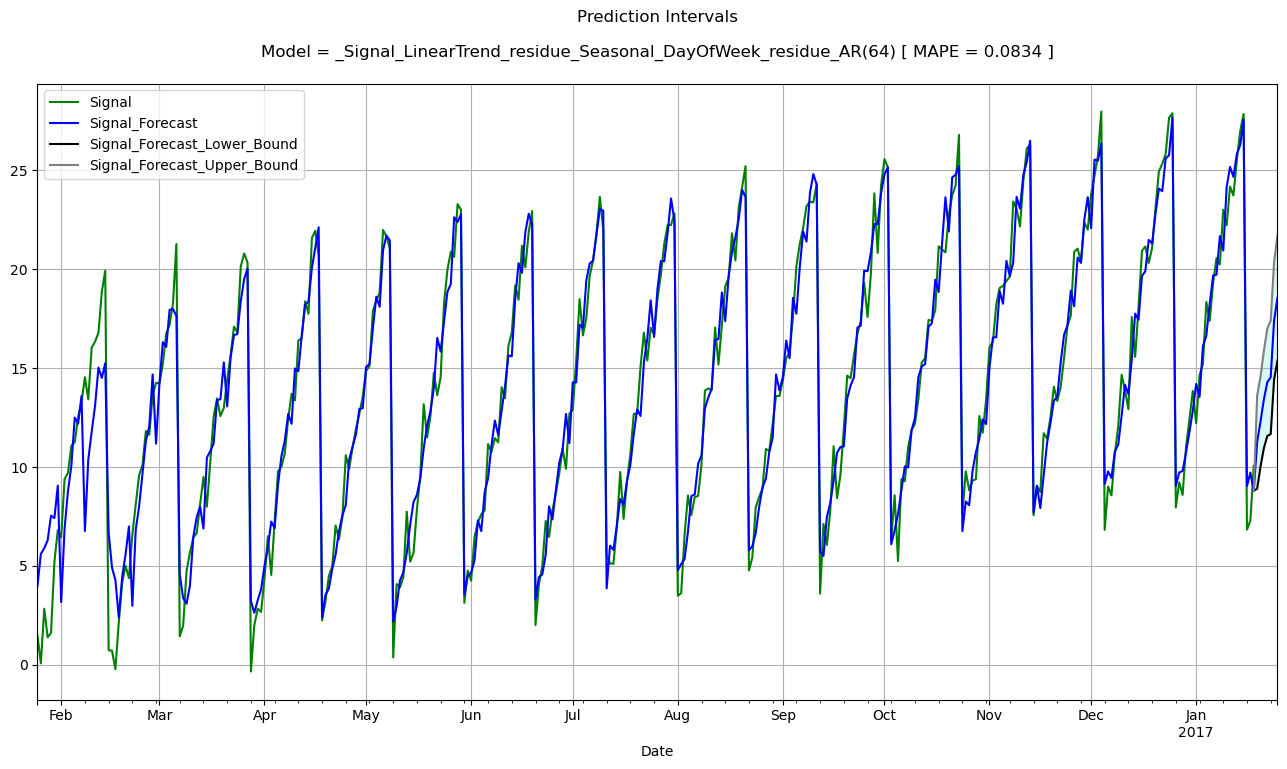

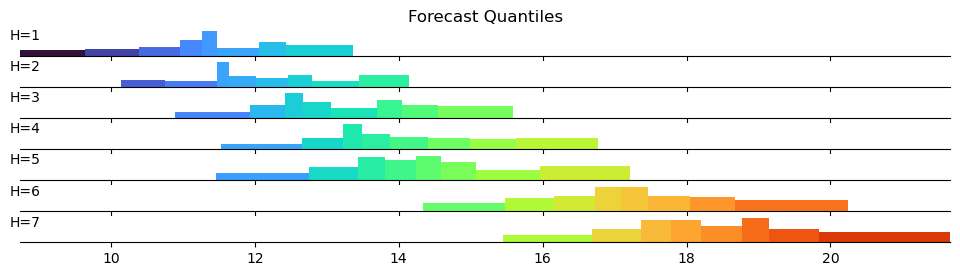

In [6]:
lEngine.standardPlots()

In [7]:

# predict one week
df_forecast = lEngine.forecast(iInputDS = df_train, iHorizon = 7)
# list the columns of the forecast dataset
print(df_forecast.columns) #

# print the real forecasts
# Future dates : ['2017-01-19T00:00:00.000000000' '2017-01-20T00:00:00.000000000' '2017-01-21T00:00:00.000000000' '2017-01-22T00:00:00.000000000' '2017-01-23T00:00:00.000000000' '2017-01-24T00:00:00.000000000' '2017-01-25T00:00:00.000000000']
print(df_forecast['Date'].tail(7).values)

# signal forecast : [ 9.74934646  10.04419761  12.15136455  12.20369717  14.09607727 15.68086323  16.22296559]
print(df_forecast['Signal_Forecast'].tail(7).values)

INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Signal'], 'Horizon': 7}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.175, ('FORECASTING', {'Signals': ['Signal'], 'Horizon': 7}))


Index(['Date', 'Signal', 'row_number', 'Date_Normalized', '_Signal',
       '_Signal_LinearTrend', '_Signal_LinearTrend_residue',
       '_Signal_LinearTrend_residue_Seasonal_DayOfWeek',
       '_Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue',
       '_Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)',
       '_Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)_residue',
       'Signal_Transformed', '_Signal_Trend', '_Signal_Trend_residue',
       '_Signal_Cycle', '_Signal_Cycle_residue', '_Signal_AR',
       '_Signal_AR_residue', '_Signal_TransformedForecast', 'Signal_Forecast',
       '_Signal_TransformedResidue', 'Signal_Residue',
       'Signal_Forecast_Lower_Bound', 'Signal_Forecast_Upper_Bound',
       'Signal_Forecast_Quantile_2', 'Signal_Forecast_Quantile_14',
       'Signal_Forecast_Quantile_26', 'Signal_Forecast_Quantile_38',
       'Signal_Forecast_Quantile_50', 'Signal_Forecast_Quantile_62',
       'Signal_Forecast_Quantile_74', 'Signal_Forecas